<h1><font color="#004D7F" size=8>FASE: Análisis de datos</font></h1>


<h2><font color="#004D7F" size=6>V I S U A L I Z A C I Ó N</font></h2>


<br><br>
<div style="text-align: left">
<font color="#004D7F" size=5>David Víctor Gómez Ramírez</font><br>
<font color="#004D7F" size=5>Predicción Métricas Stryd mediante modelo de Machine Learning</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [Introducción](#INTRODUCCION)
    * [Importar librerías necesarias](#LIBRERIAS)
    * [Cargar nuestro conjunto de datos](#CARGARDATOS)
* [Visualización Univariable](#Univariable)
    * [Histogramas](#Histogramas)
    * [Densidad](#Densidad)
    * [Boxplots](#Bocplots)
* [Estudio Visualización _"POR_CP"_](#POR_CP)
* [Estudio Visualización _"DISTANCIA"_](#DISTANCIA)
* [Estudio Visualización _"RITMO"_](#RITMO)
* [Estudio Visualización _"FREC_CARDIACA"_](#FREC_CARDIACA)
* [Estudio Visualización _"CADENCIA"_](#CADENCIA)
* [Estudio Visualización _"TSC"_](#TSC)
* [Estudio Visualización _"FP"_](#FP)
* [Estudio Visualización _"LSS"_](#LSS)
* [Estudio Visualización _"OSC_VERTICAL"_](#OSC_VERTICAL)
* [Estudio Visualización _"L_ZANCADA"_](#L_ZANCADA)
* [Estudio Visualización _"RFP"_](#RFP)
* [Estudio Visualización _"RLSS"_](#RLSS)
* [Estudio Visualización _"ROV"_](#ROV)
* [Estudio Visualización _"RE"_](#RE)
* [Estudio Visualización _"AIRE"_](#AIRE)
* [Estudio Visualización _"PENDIENTE"_](#PENDIENTE)
* [Estudio Visualización _"ALTITUD"_](#ALTITUD)
* [Estudio Visualización _"DESNIVEL"_](#DESNIVEL)
* [Estudio Visualización _"RSS"_](#RSS)
* [Estudio Visualización _"DURACION"_](#DURACION)
* [Visualización Multivariable](#MULTIVARIABLE)
    * [Matriz de correlación](#CORRELACION)
    * [Coeficientes de Pearson](#PEARSON)
    * [Coeficientes de Spearman](#SPEARMAN)
    * [Gráficos de Matriz de Dispersión](#DISPERSION)
        * [Función para Gráficos de Matriz de Dispersión](#FUNCION)
        * [Creación de grupos para graficar Matrices de Dispersión](#CREARGRUPOS)
        * [Grupo 1 "POR_CP","DISTANCIA","DURACION"](#GRAFICO1)
        * [Grupo 2 "RITMO","FREC_CARDIACA","DURACION"](#GRAFICO2)
        * [Grupo 3 "CADENCIA","TSC","DURACION"](#GRAFICO3)
        * [Grupo 4 "FP","LSS","DURACION"](#GRAFICO4)
        * [Grupo 5 "OSC_VERTICAL","L_ZANCADA","DURACION"](#GRAFICO5)
        * [Grupo 6 "RFP","RLSS","DURACION"](#GRAFICO6)
        * [Grupo 7 "ROV","RE","DURACION"](#GRAFICO7)
        * [Grupo 8 "AIRE","PENDIENTE","DURACION"](#GRAFICO8)
        * [Grupo 9 "ALTITUD","DESNIVEL","DURACION"](#GRAFICO9)
        * [Grupo 10 "RSS","DURACION"](#GRAFICO10)

---

<a id="INTRODUCCION"></a>
# <font color="#004D7F">Introducción</font>

Lo primero que debemos realizar a la hora de trabajar con machine learning es visualizar nuestros datos para conocer su comportamiento y distribución. Esta primera observación de datos posibilita aprender más sobre ellos siendo la forma más rápida y útil de conocer qué técnicas son las más adecuadas en _pre_ y _pos_ procesamiento. En este sentido en esta tercera sección trabajaremos:
* Cómo crear gráficos para entender cada atributo de manera independiente.
* Cómo crear gráficos para entender las relaciones entre los diferentes atributos.

Los gráficos de las relaciones entre los atributos pueden darnos una idea de los atributos que pueden ser redundantes, los métodos de remuestreo que pueden ser necesarios y, en última instancia, la dificultad de un problema de predicción. Para ello, la fase de visualización puede dividirse en las siguientes partes:
* **Visualización univariable**: Cuando queremos visualizar un atributo de manera independiente a los demás.
* **Visualización multivariable**: Cuando queremos visualizar la interacción entre los diferentes atributos de nuestro conjunto de datos.

<a id="LIBRERIAS"></a>
## <font color="#004D7F">Importar librerías necesarias</font>

In [31]:
# ******************************************************************************
# ***************              LIBRERÍAS A IMPORTAR              ***************
# ******************************************************************************
import pandas                       as pd
import matplotlib.pyplot            as plt
import pandas                       as pd
import numpy                        as np
import seaborn                      as sns

<a id="CARGARDATOS"></a>
## <font color="#004D7F">Cargar el conjunto de datos</font>

Para esta práctica vamos a cargar el conjunto de datos de nuestro proyecto _"SEGMENTOS_csv.csv"_ para hacer observaciones con las funciones que nos permitan hacer diferentes tipos de visualizaciones. Además y, conocedores que en _"DESNIVEL"_ hay un registro vacío, procederemos a su resolución para un mejor tratamiento.

In [32]:
# ******************************************************************************
# ***************           CARGAMOS NUESTRO DATAFRAME            ***************
# ******************************************************************************
# Cargamos los datos contenidos en "SEGMENTOS_csv.csv"
data = pd.read_csv('SEGMENTOS_csv.csv')
# Completamos los datos nulos con la media de cada uno
data['DESNIVEL']        = data['DESNIVEL'].fillna(data['DESNIVEL'].median())
print(data.head(15))

    POR_CP  DISTANCIA  RITMO  FREC_CARDIACA  CADENCIA  TSC  FP   LSS  \
0   85.863        500    519            154       166  340  64  12.0   
1   84.816       1000    547            130       159  343  66  11.8   
2   84.293       1000    537            137       161  346  66  12.1   
3   84.816       1000    540            142       162  347  66  12.2   
4   84.816       1000    539            146       163  345  65  12.1   
5   84.816       1000    542            150       163  346  65  12.3   
6   84.816       1000    537            152       165  339  65  12.4   
7   85.863        600    524            155       165  341  64  12.1   
8   85.340        530    561            128       158  340  65  11.7   
9   84.816       5570    538            145       163  345  66  12.2   
10  84.816       2000    545            134       160  345  66  11.9   
11  84.816       2000    540            144       162  346  66  12.2   
12  84.816       2000    539            151       164  342  65  

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="Univariable"></a>
# <font color="#004D7F">Visualización Univariable</font>

Como se ha comentado anteriormente, las gráficas univariable nos permiten visualizar los atributos individuales sin interacciones; las cuales, el objetivo principal de las mismas es aprender algo sobre la distribución, la tendencia y la propagación de cada atributo.

A continuación se describen las más relevantes.

<a id="Histogramas"></a>
## <font color="#004D7F">Histogramas </font>

A partir de la forma de los contenedores, puede tener una idea rápida de si un atributo es gaussiano, sesgado o incluso tiene una distribución exponencial. También puede ayudarlo a ver posibles valores atípicos, por lo que tanto `Matplotlib` como  `Seaborn`pueden ser potentes librerías de visualización de datos.

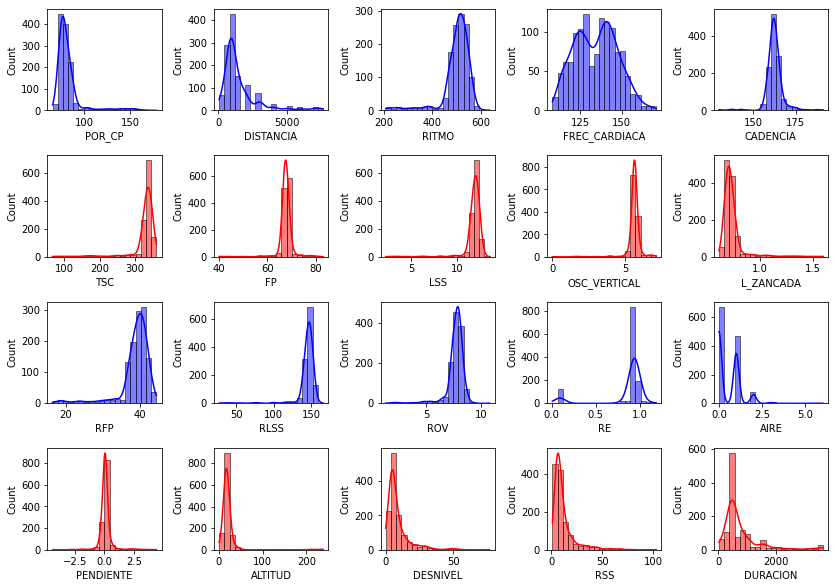

In [33]:
%matplotlib inline
# Univariate Histograms
# **********************************************************************************
# *******************              VISUALIZACIONES               *******************
# **********************************************************************************
#   Visualizamos histograma de distribución y densidad
f, axes = plt.subplots(4,5, figsize =(11.7,8.27))
sns.histplot(data["POR_CP"],                ax= axes [0,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["DISTANCIA"],             ax= axes [0,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["RITMO"],                 ax= axes [0,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["FREC_CARDIACA"],         ax= axes [0,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["CADENCIA"],              ax= axes [0,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["TSC"],                   ax= axes [1,0],kde = True, bins = 20, color="Red", fill=True)
sns.histplot(data["FP"],                    ax= axes [1,1],kde = True, bins = 20, color="Red", fill=True)
sns.histplot(data["LSS"],                   ax= axes [1,2],kde = True, bins = 20, color="Red", fill=True)
sns.histplot(data["OSC_VERTICAL"],          ax= axes [1,3],kde = True, bins = 20, color="Red", fill=True)
sns.histplot(data["L_ZANCADA"],             ax= axes [1,4],kde = True, bins = 20, color="Red", fill=True)
sns.histplot(data["RFP"],                   ax= axes [2,0],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["RLSS"],                  ax= axes [2,1],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["ROV"],                   ax= axes [2,2],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["RE"],                    ax= axes [2,3],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["AIRE"],                  ax= axes [2,4],kde = True, bins = 20, color="Blue", fill=True)
sns.histplot(data["PENDIENTE"],             ax= axes [3,0],kde = True, bins = 20, color="Red", fill=True)
sns.histplot(data["ALTITUD"],               ax= axes [3,1],kde = True, bins = 20, color="Red", fill=True)
sns.histplot(data["DESNIVEL"],              ax= axes [3,2],kde = True, bins = 20, color="Red", fill=True)
sns.histplot(data["RSS"],                   ax= axes [3,3],kde = True, bins = 20, color="Red", fill=True)
sns.histplot(data["DURACION"],              ax= axes [3,4],kde = True, bins = 20, color="Red", fill=True)
plt.tight_layout()
plt.show()


Siempre, a priori, y visualmente hablando, podemos observar que la mayoría de los atributos suelen tener una distribución casi gaussiana o normal (algunas simples, otras con doble campana `FREC_CARDIACA` y `REC` y otra triple campana `AIRE`)y aparentemente alguna exponencial `L_ZANCADA`. También podemos observar la existencia de sesgo en casi todas las distribucione siendo este menor o casi inexistente en `FREC_CARDIACA` y `CADENCIA`. Esto es interesante porque muchas técnicas de aprendizaje automático suponen una distribución univariada gaussiana en las variables de entrada.


<a id="Densidad"></a>
## <font color="#004D7F">Densidad </font>

Las gráficas se ven como un histograma abstracto con una curva suave dibujada a través de la parte superior de cada contenedor, al igual que su ojo intentó hacer con los histogramas. Podemos ver que la distribución de cada atributo es más clara que los histogramas

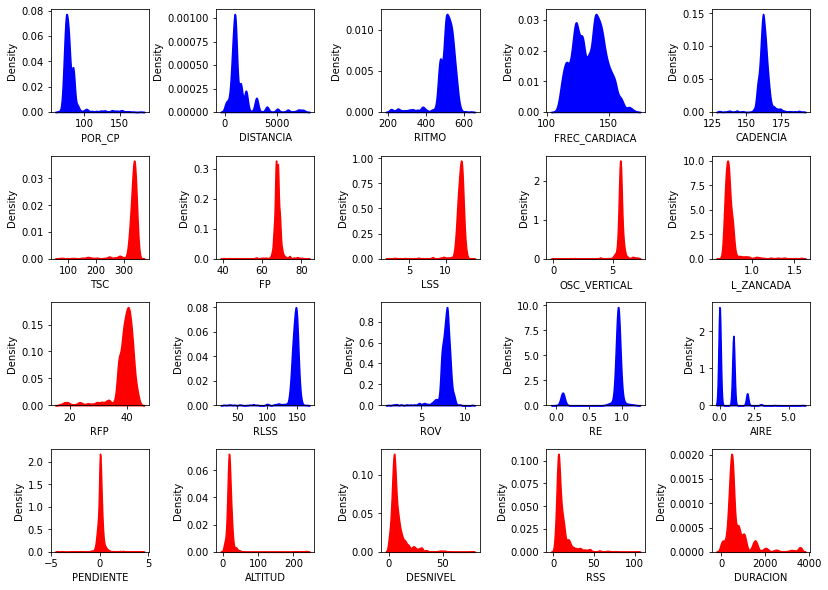

In [34]:
#%matplotlib inline
# Univariate Histograms
# GRAFICOS DE DENSIDAD
f, axes = plt.subplots(4,5, figsize =(11.7,8.27))
sns.kdeplot(data["POR_CP"],         ax = axes [0,0], shade = True, color = "Blue", fill = True,
                                    bw_adjust = .5, clip_on = False, alpha=1, linewidth=1.5)
sns.kdeplot(data["DISTANCIA"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                    bw_adjust = .5, clip_on = False, alpha=1, linewidth=1.5)
sns.kdeplot(data["RITMO"],          ax = axes [0,2], shade = True, color = "Blue", fill = True,
                                    bw_adjust = .5, clip_on = False, alpha=1, linewidth=1.5)
sns.kdeplot(data["FREC_CARDIACA"],  ax = axes [0,3], shade = True, color = "Blue", fill = True,
                                    bw_adjust=.5, clip_on = False, alpha=1, linewidth=1.5)
sns.kdeplot(data["CADENCIA"],       ax = axes [0,4], shade = True, color = "Blue", fill = True,
                                    bw_adjust=.5, clip_on = False, alpha=1, linewidth=1.5)
sns.kdeplot(data["TSC"],            ax = axes [1,0], shade = True, color = "Red", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["FP"],             ax = axes [1,1], shade = True, color = "Red", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["LSS"],            ax = axes [1,2], shade = True, color = "Red", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["OSC_VERTICAL"],   ax = axes [1,3], shade = True, color = "Red", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["L_ZANCADA"],      ax = axes [1,4], shade = True, color = "Red", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["RFP"],            ax = axes [2,0], shade = True, color = "Red", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["RLSS"],           ax = axes [2,1], shade = True, color = "Blue", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["ROV"],            ax = axes [2,2], shade = True, color = "Blue", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["RE"],             ax = axes [2,3], shade = True, color = "Blue", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["AIRE"],           ax = axes [2,4], shade = True, color = "Blue", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["PENDIENTE"],      ax = axes [3,0], shade = True, color = "Red", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["ALTITUD"],        ax = axes [3,1], shade = True, color = "Red", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["DESNIVEL"],       ax = axes [3,2], shade = True, color = "Red", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["RSS"],            ax = axes [3,3], shade = True, color = "Red", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
sns.kdeplot(data["DURACION"],       ax = axes [3,4], shade = True, color = "Red", fill = True,
                                    bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)
plt.tight_layout()
plt.show()

<a id="Boxplots"></a>
## <font color="#004D7F">Boxplots </font>

Podemos ver que la extensión de los atributos es bastante diferente. Algunos como la `FREC_CARDIACA`, `L_ZANCADA` y `RFP` parecen bastante sesgados hacia valores más pequeños.

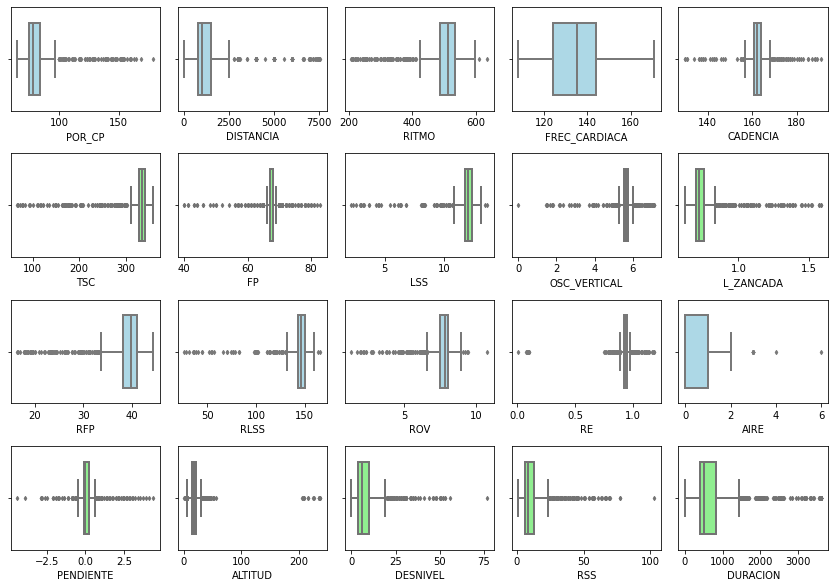

In [35]:
%matplotlib inline
# Univariate Boxplots
# GRÁFICOS BOXPLOTS
f, axes = plt.subplots(4,5, figsize =(11.7,8.27))
sns.boxplot(x = data["POR_CP"],         ax = axes [0,0], orient = "h", color = "lightblue", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["DISTANCIA"],      ax = axes [0,1], orient = "h", color = "lightblue", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["RITMO"],          ax = axes [0,2], orient = "h", color = "lightblue", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["FREC_CARDIACA"],  ax = axes [0,3], orient = "h", color = "lightblue", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["CADENCIA"],       ax = axes [0,4], orient = "h", color = "lightblue", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["TSC"],            ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["FP"],             ax = axes [1,1], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["LSS"],            ax = axes [1,2], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["OSC_VERTICAL"],   ax = axes [1,3], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["L_ZANCADA"],      ax = axes [1,4], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["RFP"],            ax = axes [2,0], orient = "h", color = "lightblue", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["RLSS"],           ax = axes [2,1], orient = "h", color = "lightblue", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["ROV"],            ax = axes [2,2], orient = "h", color = "lightblue", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["RE"],             ax = axes [2,3], orient = "h", color = "lightblue", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["AIRE"],           ax = axes [2,4], orient = "h", color = "lightblue", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["PENDIENTE"],      ax = axes [3,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["ALTITUD"],        ax = axes [3,1], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["DESNIVEL"],       ax = axes [3,2], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["RSS"],            ax = axes [3,3], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
sns.boxplot(x = data["DURACION"],       ax = axes [3,4], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="POR_CP"></a>
# <font color="#004D7F">Estudio Visualización _"POR_CP"_</font>

               ===============          MEDIA DE POR_CP:    81.94961          ===============
               ===============          MEDIANA DE POR_CP:  77.98100          ===============
               ===============          SESGO DE POR_CP:     3.48925          ===============
               ===============          VARIANZA DE POR_CP: 14.84347          ===============


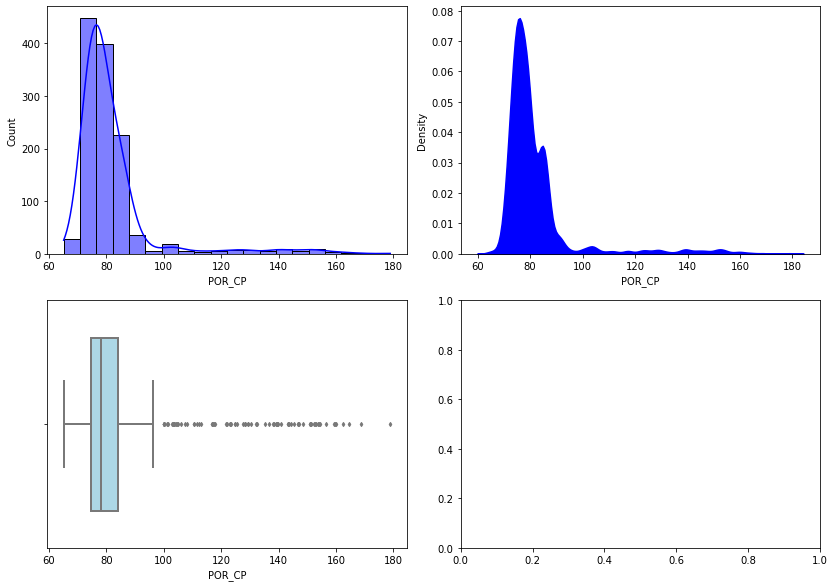

In [36]:
# Estudio Visualización "POR_CP"

# Métricas POR_CP
print("               ==============================================================================")
print(f"               ===============          MEDIA DE POR_CP:    {data['POR_CP'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE POR_CP:  {data['POR_CP'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE POR_CP:     {data['POR_CP'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE POR_CP: {data['POR_CP'].std():,.5f}          ===============")
print("               ==============================================================================")

# Visualización Histograma, Densidad y Boxplot de POR_CP
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["POR_CP"],        ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["POR_CP"],         ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                    bw_adjust = .5, clip_on = False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["POR_CP"],     ax = axes [1,0], orient = "h", color = "lightblue", saturation = 1,
                                    width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="DISTANCIA"></a>
# <font color="#004D7F">Estudio Visualización _"DISTANCIA"_</font>

               ===============          MEDIA DE DISTANCIA:     1,517.45321          ===============
               ===============          MEDIANA DE DISTANCIA:   1,000.00000          ===============
               ===============          SESGO DE DISTANCIA:         2.52806          ===============
               ===============          VARIANZA DE DISTANCIA:  1,359.90764          ===============


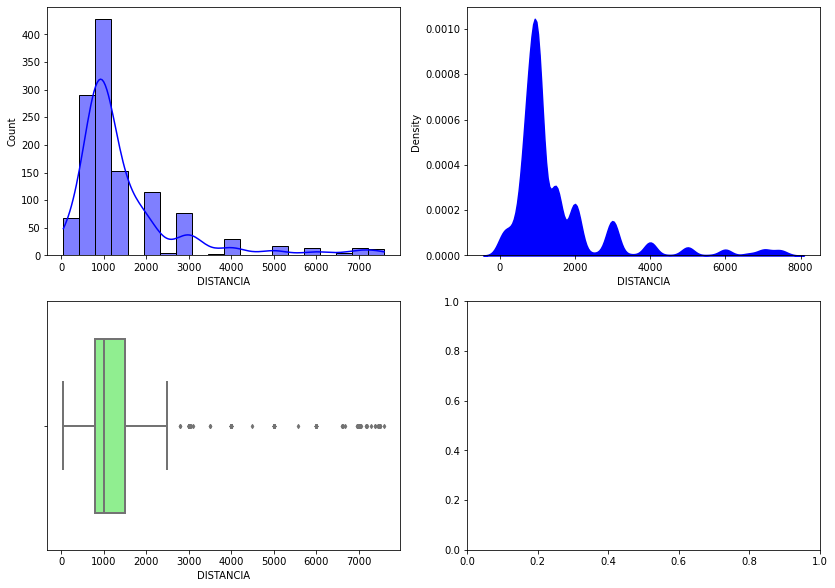

In [37]:
# Estudio Visualización "DISTANCIA"
# Métricas DISTANCIA
print("               =====================================================================================")
print(f"               ===============          MEDIA DE DISTANCIA:     {data['DISTANCIA'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE DISTANCIA:   {data['DISTANCIA'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE DISTANCIA:         {data['DISTANCIA'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE DISTANCIA:  {data['DISTANCIA'].std():,.5f}          ===============")
print("               =====================================================================================")

# Visualización Histograma, Densidad y Boxplot de DISTANCIA
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["DISTANCIA"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["DISTANCIA"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["DISTANCIA"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="RITMO"></a>
# <font color="#004D7F">Estudio Visualización _"RITMO"_</font>

               ===============          MEDIA DE RITMO:     501.77705          ===============
               ===============          MEDIANA DE RITMO:   513.00000          ===============
               ===============          SESGO DE RITMO:      -2.61498          ===============
               ===============          VARIANZA DE RITMO:   59.27862          ===============


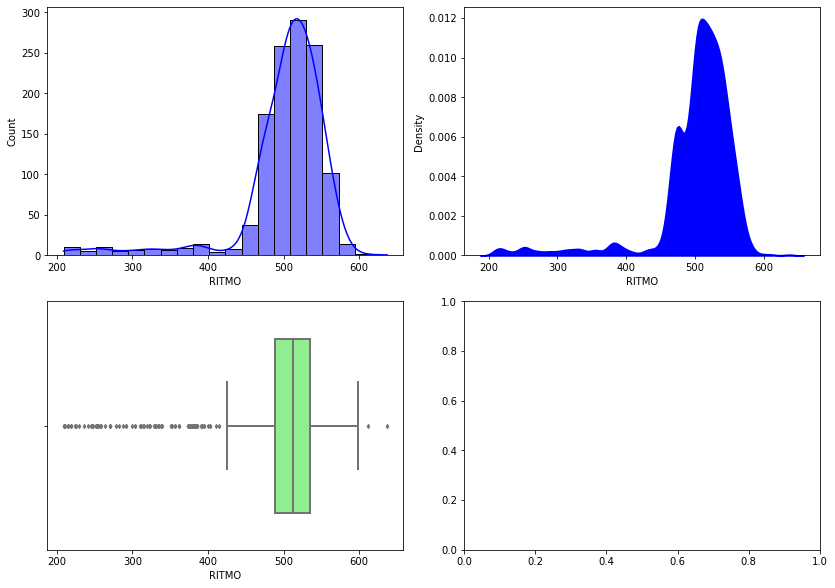

In [38]:
# Estudio Visualización "RITMO"
# Métricas RITMO
print("               ===============================================================================")
print(f"               ===============          MEDIA DE RITMO:     {data['RITMO'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE RITMO:   {data['RITMO'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE RITMO:      {data['RITMO'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE RITMO:   {data['RITMO'].std():,.5f}          ===============")
print("               ===============================================================================")

# Visualización Histograma, Densidad y Boxplot de RITMO
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["RITMO"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["RITMO"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["RITMO"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="FREC_CARDIACA"></a>
# <font color="#004D7F">Estudio Visualización _"FREC_CARDIACA"_</font>

               ===============          MEDIA DE FREC_CARDIACA:    134.55004          ===============
               ===============          MEDIANA DE FREC_CARDIACA:  135.00000          ===============
               ===============          SESGO DE FREC_CARDIACA:      0.12813          ===============
               ===============          VARIANZA DE FREC_CARDIACA:  12.76326          ===============


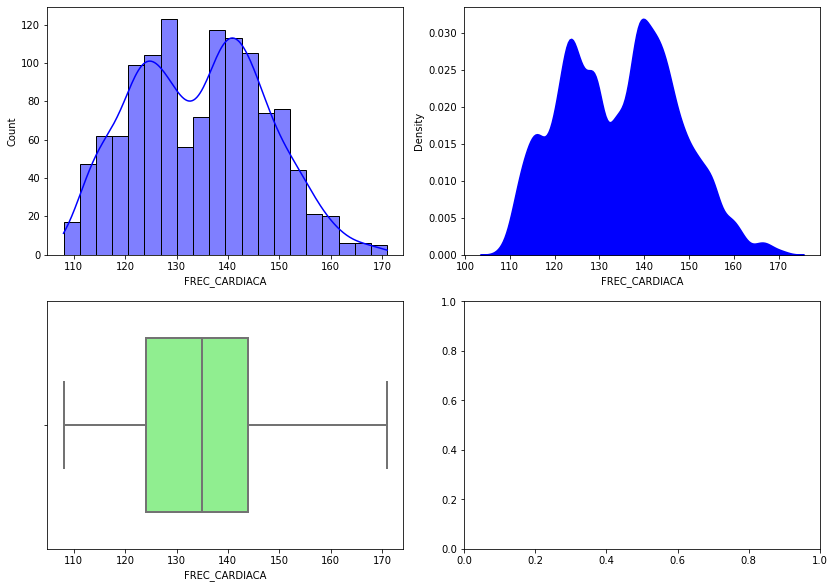

In [39]:
# Estudio Visualización "FREC_CARDIACA"
# Métricas FREC_CARDIACA
print("               ======================================================================================")
print(f"               ===============          MEDIA DE FREC_CARDIACA:    {data['FREC_CARDIACA'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE FREC_CARDIACA:  {data['FREC_CARDIACA'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE FREC_CARDIACA:      {data['FREC_CARDIACA'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE FREC_CARDIACA:  {data['FREC_CARDIACA'].std():,.5f}          ===============")
print("               ======================================================================================")

# Visualización Histograma, Densidad y Boxplot de FREC_CARDIACA
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["FREC_CARDIACA"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["FREC_CARDIACA"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["FREC_CARDIACA"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="CADENCIA"></a>
# <font color="#004D7F">Estudio Visualización _"CADENCIA"_</font>

               ===============          MEDIA DE CADENCIA:     162.51017          ===============
               ===============          MEDIANA DE CADENCIA:   162.00000          ===============
               ===============          SESGO DE CADENCIA:      -0.66854          ===============
               ===============          VARIANZA DE CADENCIA:    5.27834          ===============


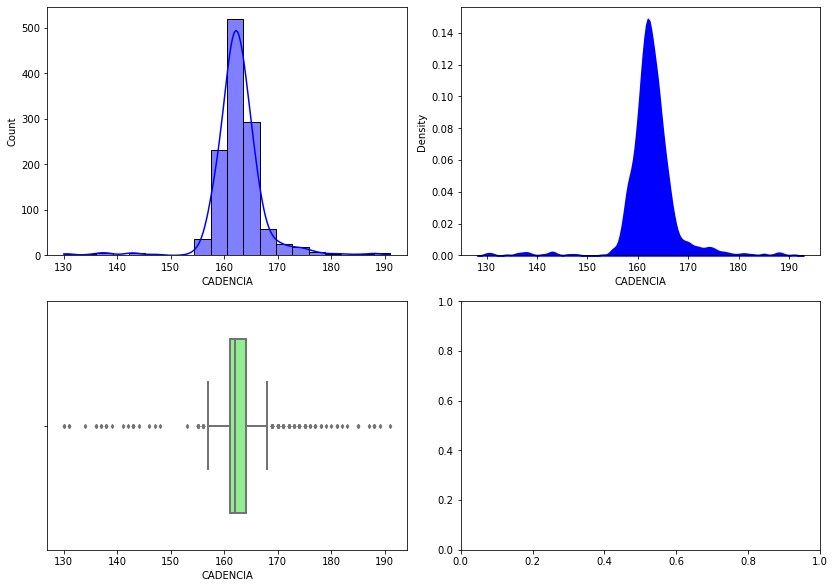

In [40]:
# Estudio Visualización "CADENCIA"
# Métricas CADENCIA
print("               ==================================================================================")
print(f"               ===============          MEDIA DE CADENCIA:     {data['CADENCIA'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE CADENCIA:   {data['CADENCIA'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE CADENCIA:      {data['CADENCIA'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE CADENCIA:    {data['CADENCIA'].std():,.5f}          ===============")
print("               ==================================================================================")

# Visualización Histograma, Densidad y Boxplot de CADENCIA
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["CADENCIA"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["CADENCIA"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["CADENCIA"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="TSC"></a>
# <font color="#004D7F">Estudio Visualización _"TSC"_</font>

               ===============          MEDIA DE TSC:     325.17901          ===============
               ===============          MEDIANA DE TSC:   336.00000          ===============
               ===============          SESGO DE TSC:      -3.94731          ===============
               ===============          VARIANZA DE TSC:   41.20724          ===============


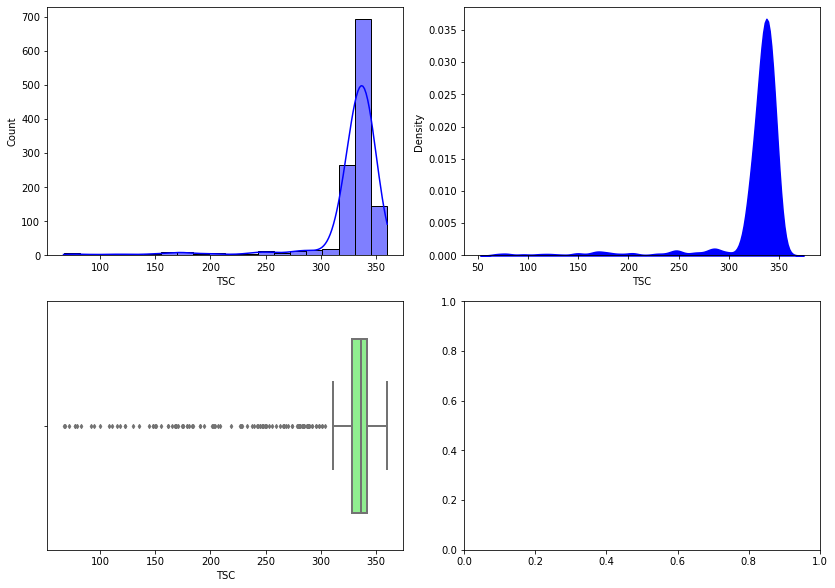

In [41]:
# Estudio Visualización "TSC"
# Métricas TSC
print("               =============================================================================")
print(f"               ===============          MEDIA DE TSC:     {data['TSC'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE TSC:   {data['TSC'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE TSC:      {data['TSC'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE TSC:   {data['TSC'].std():,.5f}          ===============")
print("               =============================================================================")

# Visualización Histograma, Densidad y Boxplot de TSC
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["TSC"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["TSC"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["TSC"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="FP"></a>
# <font color="#004D7F">Estudio Visualización _"FP"_</font>

               ===============          MEDIA DE FP:      67.50529          ===============
               ===============          MEDIANA DE FP:    68.00000          ===============
               ===============          SESGO DE FP:      -3.10833          ===============
               ===============          VARIANZA DE FP:    3.47223          ===============


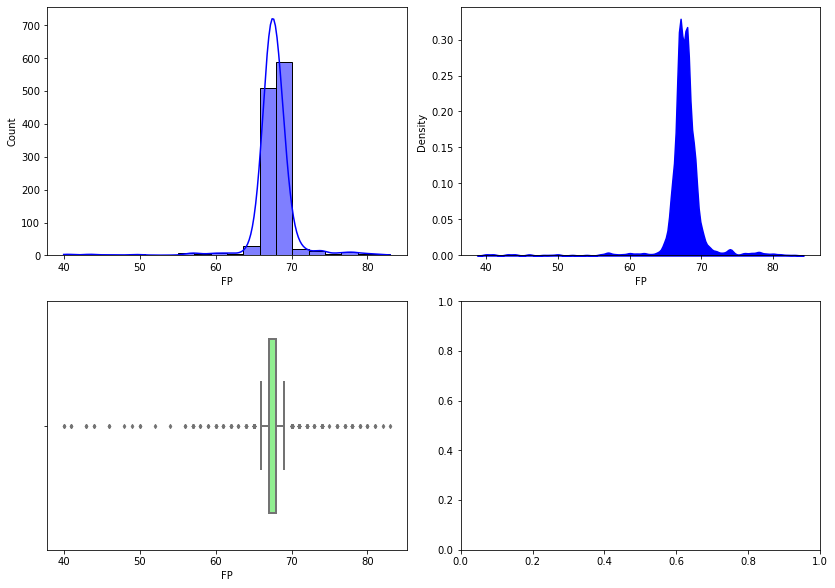

In [42]:
# Estudio Visualización "FP"
# Métricas FP
print("               ============================================================================")
print(f"               ===============          MEDIA DE FP:      {data['FP'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE FP:    {data['FP'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE FP:      {data['FP'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE FP:    {data['FP'].std():,.5f}          ===============")
print("               ============================================================================")

# Visualización Histograma, Densidad y Boxplot de FP
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["FP"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["FP"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["FP"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="LSS"></a>
# <font color="#004D7F">Estudio Visualización _"LSS"_</font>

               ===============          MEDIA DE LSS:      11.81676          ===============
               ===============          MEDIANA DE LSS:    12.00000          ===============
               ===============          SESGO DE LSS:      -5.28746          ===============
               ===============          VARIANZA DE LSS:    1.18628          ===============


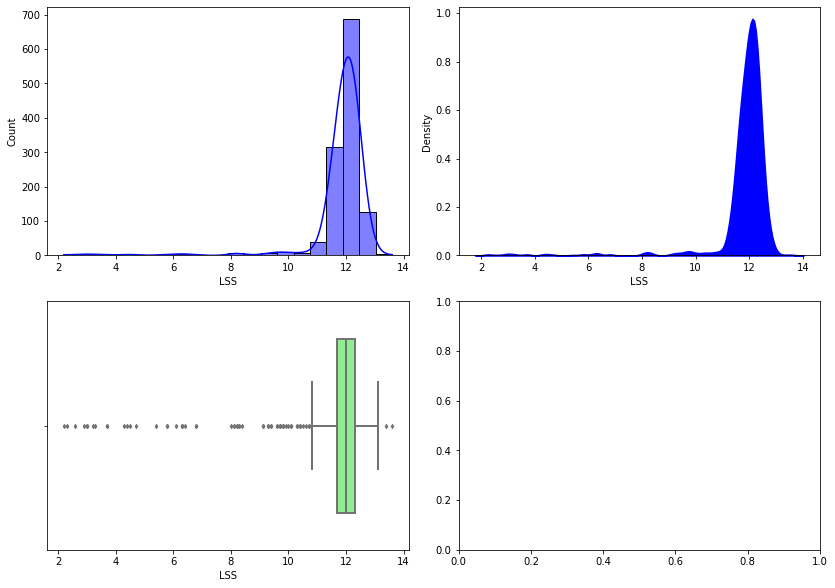

In [43]:
# Estudio Visualización "LSS"
# Métricas LSS
print("               =============================================================================")
print(f"               ===============          MEDIA DE LSS:      {data['LSS'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE LSS:    {data['LSS'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE LSS:      {data['LSS'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE LSS:    {data['LSS'].std():,.5f}          ===============")
print("               =============================================================================")

# Visualización Histograma, Densidad y Boxplot de LSS
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["LSS"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["LSS"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["LSS"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="OSC_VERTICAL"></a>
# <font color="#004D7F">Estudio Visualización _"OSC_VERTICAL"_</font>

               ===============          MEDIA DE OSC_VERTICAL:        5.59492          ===============
               ===============          MEDIANA DE OSC_VERTICAL:      5.64000          ===============
               ===============          SESGO DE OSC_VERTICAL:       -4.79063          ===============
               ===============          VARIANZA DE OSC_VERTICAL:     0.52152          ===============


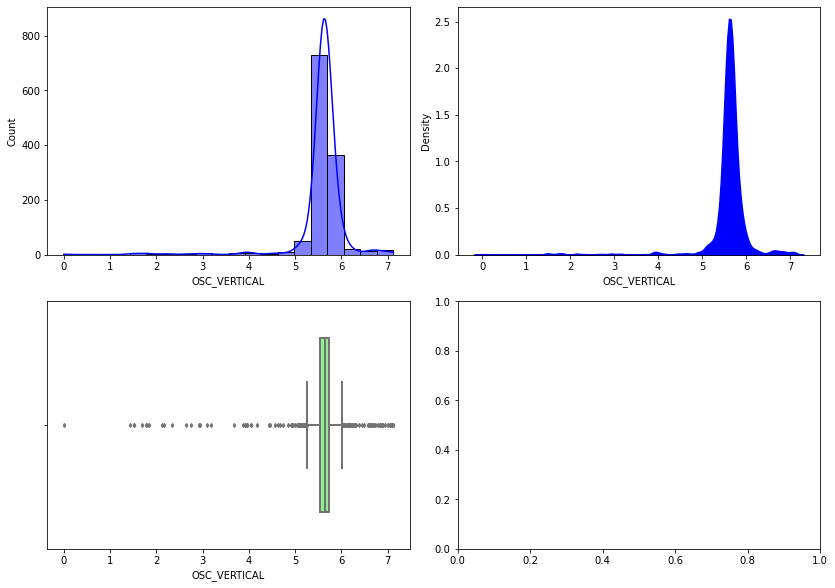

In [44]:
# Estudio Visualización "OSC_VERTICAL"
# Métricas OSC_VERTICAL
print("               =======================================================================================")
print(f"               ===============          MEDIA DE OSC_VERTICAL:        {data['OSC_VERTICAL'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE OSC_VERTICAL:      {data['OSC_VERTICAL'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE OSC_VERTICAL:       {data['OSC_VERTICAL'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE OSC_VERTICAL:     {data['OSC_VERTICAL'].std():,.5f}          ===============")
print("               =======================================================================================")

# Visualización Histograma, Densidad y Boxplot de OSC_VERTICAL
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["OSC_VERTICAL"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["OSC_VERTICAL"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["OSC_VERTICAL"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="L_ZANCADA"></a>
# <font color="#004D7F">Estudio Visualización _"L_ZANCADA"_</font>

               ===============          MEDIA DE L_ZANCADA:       0.74927          ===============
               ===============          MEDIANA DE L_ZANCADA:     0.72100          ===============
               ===============          SESGO DE L_ZANCADA:       4.18905          ===============
               ===============          VARIANZA DE L_ZANCADA:    0.12113          ===============


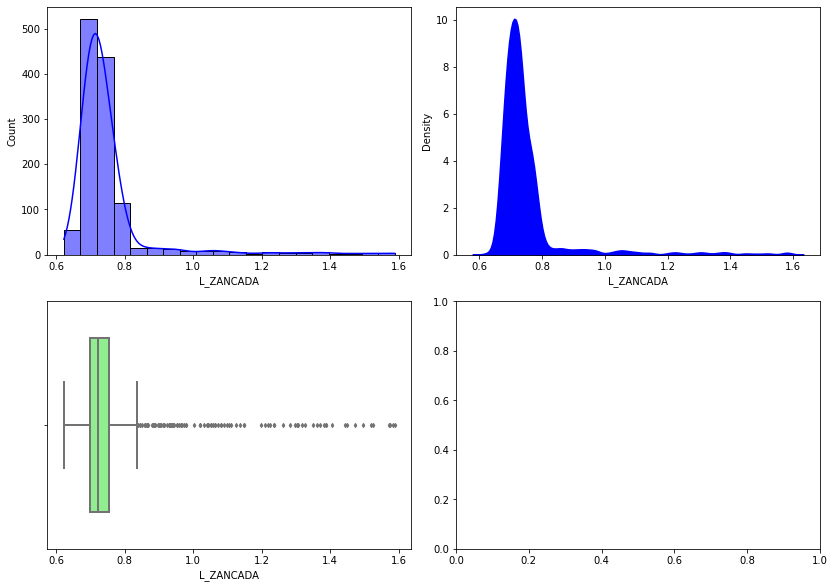

In [45]:
# Estudio Visualización "L_ZANCADA"
# Métricas L_ZANCADA
print("               ===================================================================================")
print(f"               ===============          MEDIA DE L_ZANCADA:       {data['L_ZANCADA'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE L_ZANCADA:     {data['L_ZANCADA'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE L_ZANCADA:       {data['L_ZANCADA'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE L_ZANCADA:    {data['L_ZANCADA'].std():,.5f}          ===============")
print("               ===================================================================================")

# Visualización Histograma, Densidad y Boxplot de L_ZANCADA
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["L_ZANCADA"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["L_ZANCADA"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["L_ZANCADA"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()


---
<a id="RFP"></a>
# <font color="#004D7F">Estudio Visualización _"RFP"_</font>

               ===============          MEDIA DE RFP:      38.74932          ===============
               ===============          MEDIANA DE RFP:    39.75900          ===============
               ===============          SESGO DE RFP:      -2.86990          ===============
               ===============          VARIANZA DE RFP:    4.31484          ===============


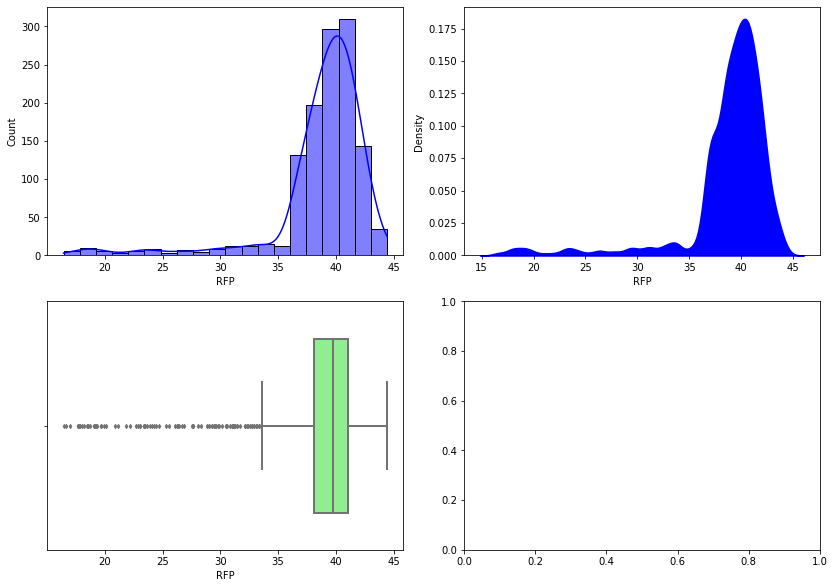

In [46]:
# Estudio Visualización "RFP"
# Métricas RFP
print("               =============================================================================")
print(f"               ===============          MEDIA DE RFP:      {data['RFP'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE RFP:    {data['RFP'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE RFP:      {data['RFP'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE RFP:    {data['RFP'].std():,.5f}          ===============")
print("               =============================================================================")

# Visualización Histograma, Densidad y Boxplot de RFP
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["RFP"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["RFP"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["RFP"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="RLSS"></a>
# <font color="#004D7F">Estudio Visualización _"RLSS"_</font>

               ===============          MEDIA DE RLSS:     144.10631          ===============
               ===============          MEDIANA DE RLSS:   146.34100          ===============
               ===============          SESGO DE RLSS:      -5.28741          ===============
               ===============          VARIANZA DE RLSS:   14.46686          ===============


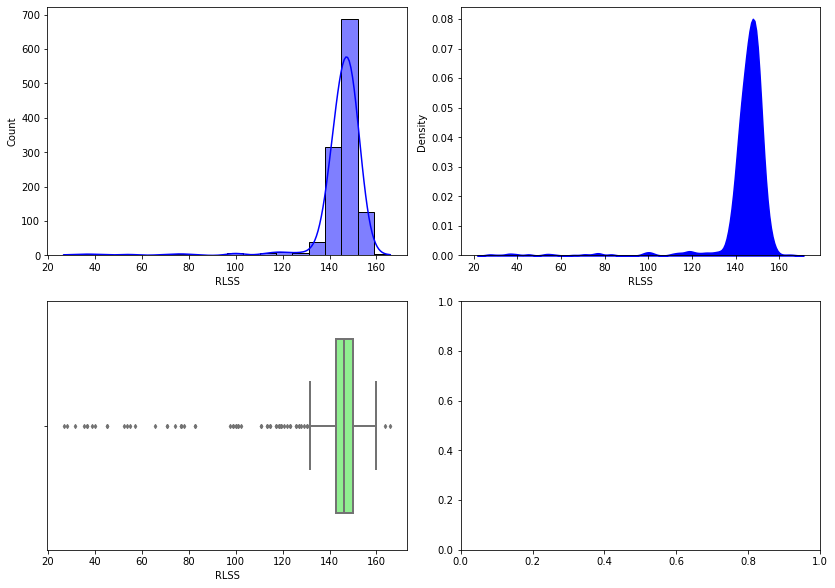

In [47]:
# Estudio Visualización "RLSS"
# Métricas RLSS
print("               ==============================================================================")
print(f"               ===============          MEDIA DE RLSS:     {data['RLSS'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE RLSS:   {data['RLSS'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE RLSS:      {data['RLSS'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE RLSS:   {data['RLSS'].std():,.5f}          ===============")
print("               ==============================================================================")

# Visualización Histograma, Densidad y Boxplot de RLSS
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["RLSS"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["RLSS"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["RLSS"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="ROV"></a>
# <font color="#004D7F">Estudio Visualización _"ROV"_</font>

               ===============          MEDIA DE ROV:       7.67679          ===============
               ===============          MEDIANA DE ROV:     7.83000          ===============
               ===============          SESGO DE ROV:      -3.45735          ===============
               ===============          VARIANZA DE ROV:    0.86069          ===============


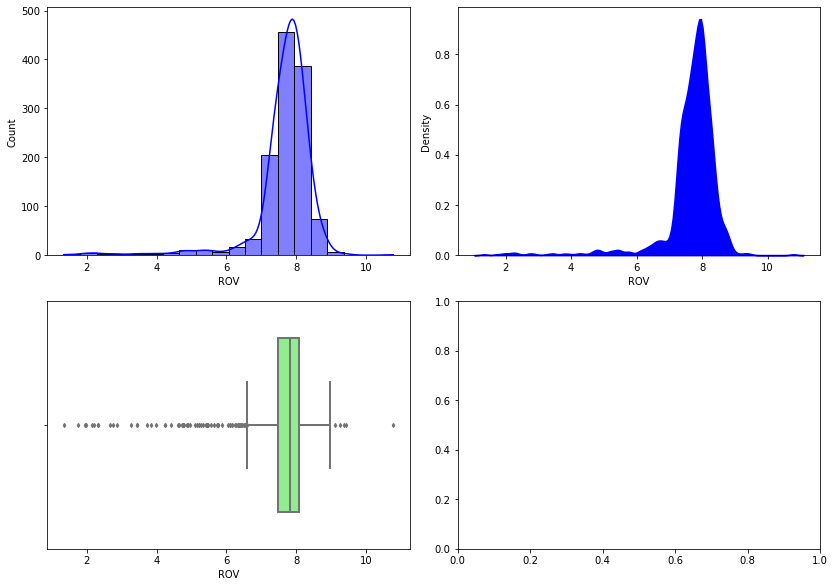

In [48]:
# Estudio Visualización "ROV"
# Métricas ROV
print("               =============================================================================")
print(f"               ===============          MEDIA DE ROV:       {data['ROV'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE ROV:     {data['ROV'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE ROV:      {data['ROV'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE ROV:    {data['ROV'].std():,.5f}          ===============")
print("               =============================================================================")

# Visualización Histograma, Densidad y Boxplot de ROV
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["ROV"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["ROV"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["ROV"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="RE"></a>
# <font color="#004D7F">Estudio Visualización _"RE"_</font>

               ===============          MEDIA DE RE:       0.85682          ===============
               ===============          MEDIANA DE RE:     0.93800          ===============
               ===============          SESGO DE RE:      -2.58906          ===============
               ===============          VARIANZA DE RE:    0.25616          ===============


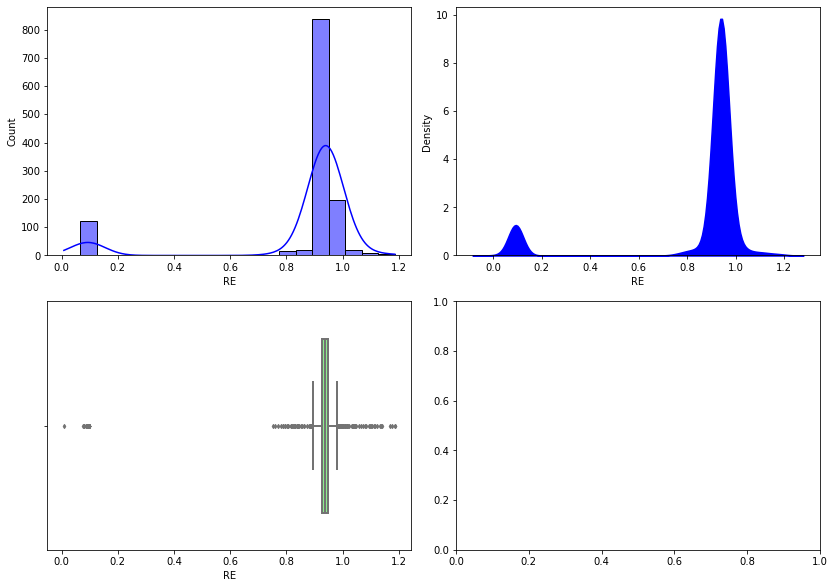

In [49]:
# Estudio Visualización "RE"
# Métricas RE
print("               ============================================================================")
print(f"               ===============          MEDIA DE RE:       {data['RE'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE RE:     {data['RE'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE RE:      {data['RE'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE RE:    {data['RE'].std():,.5f}          ===============")
print("               ============================================================================")

# Visualización Histograma, Densidad y Boxplot de RE
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["RE"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["RE"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["RE"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="AIRE"></a>
# <font color="#004D7F">Estudio Visualización _"AIRE"_</font>

               ===============          MEDIA DE AIRE:      0.53784          ===============
               ===============          MEDIANA DE AIRE:    0.00000          ===============
               ===============          SESGO DE AIRE:      1.36583          ===============
               ===============          VARIANZA DE AIRE:   0.67015          ===============


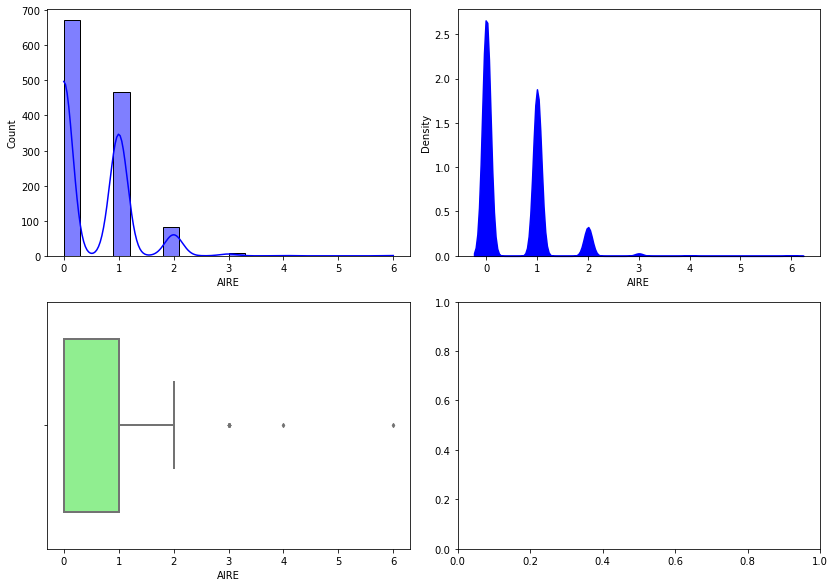

In [50]:
# Estudio Visualización "AIRE"
# Métricas AIRE
print("               =============================================================================")
print(f"               ===============          MEDIA DE AIRE:      {data['AIRE'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE AIRE:    {data['AIRE'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE AIRE:      {data['AIRE'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE AIRE:   {data['AIRE'].std():,.5f}          ===============")
print("               =============================================================================")

# Visualización Histograma, Densidad y Boxplot de AIRE
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["AIRE"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["AIRE"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["AIRE"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="PENDIENTE"></a>
# <font color="#004D7F">Estudio Visualización _"PENDIENTE"_</font>

               ===============          MEDIA DE PENDIENTE:       0.08242          ===============
               ===============          MEDIANA DE PENDIENTE:     0.00000          ===============
               ===============          SESGO DE PENDIENTE:       1.25363          ===============
               ===============          VARIANZA DE PENDIENTE:    0.58032          ===============


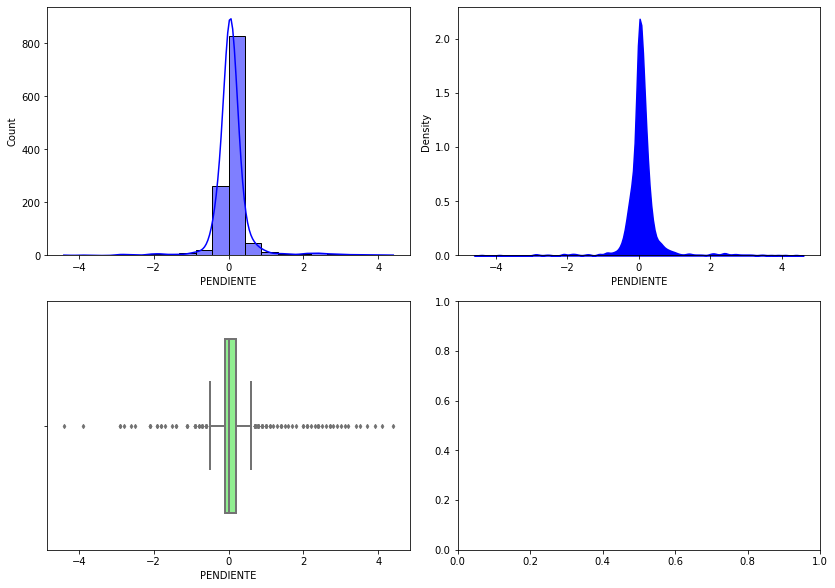

In [51]:
# Estudio Visualización "PENDIENTE"
# Métricas PENDIENTE
print("               ===================================================================================")
print(f"               ===============          MEDIA DE PENDIENTE:       {data['PENDIENTE'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE PENDIENTE:     {data['PENDIENTE'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE PENDIENTE:       {data['PENDIENTE'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE PENDIENTE:    {data['PENDIENTE'].std():,.5f}          ===============")
print("               ===================================================================================")

# Visualización Histograma, Densidad y Boxplot de PENDIENTE
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["PENDIENTE"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["PENDIENTE"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["PENDIENTE"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="ALTITUD"></a>
# <font color="#004D7F">Estudio Visualización _"ALTITUD"_</font>

               ===============          MEDIA DE ALTITUD:     20.84784          ===============
               ===============          MEDIANA DE ALTITUD:   18.00000          ===============
               ===============          SESGO DE ALTITUD:      8.09177          ===============
               ===============          VARIANZA DE ALTITUD:  22.84551          ===============


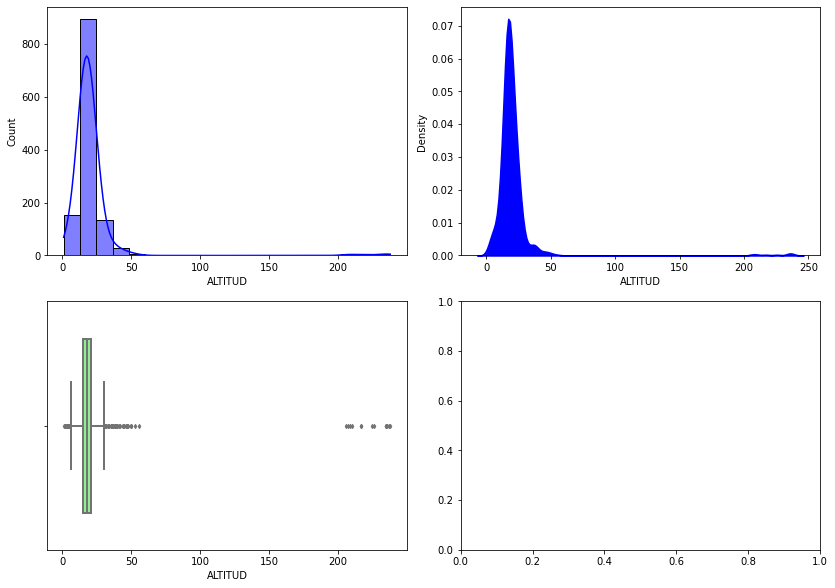

In [52]:
# Estudio Visualización "ALTITUD"
# Métricas ALTITUD
print("               ================================================================================")
print(f"               ===============          MEDIA DE ALTITUD:     {data['ALTITUD'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE ALTITUD:   {data['ALTITUD'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE ALTITUD:      {data['ALTITUD'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE ALTITUD:  {data['ALTITUD'].std():,.5f}          ===============")
print("               ================================================================================")

# Visualización Histograma, Densidad y Boxplot de ALTITUD
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["ALTITUD"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["ALTITUD"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["ALTITUD"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="DESNIVEL"></a>
# <font color="#004D7F">Estudio Visualización _"DESNIVEL"_</font>

               ===============          MEDIA DE DESNIVEL:      8.60781          ===============
               ===============          MEDIANA DE DESNIVEL:    6.00000          ===============
               ===============          SESGO DE DESNIVEL:      2.81566          ===============
               ===============          VARIANZA DE DESNIVEL:   8.52888          ===============


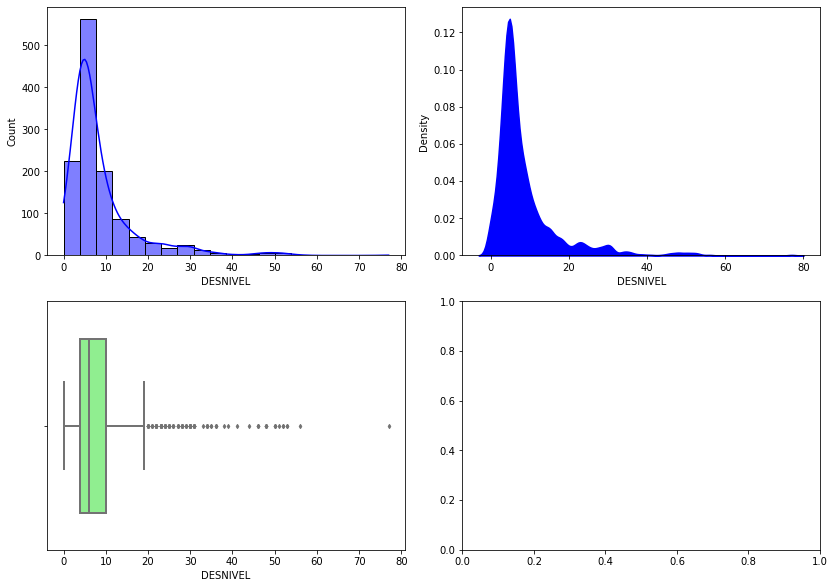

In [53]:
# Estudio Visualización "DESNIVEL"
# Métricas DESNIVEL
print("               =================================================================================")
print(f"               ===============          MEDIA DE DESNIVEL:      {data['DESNIVEL'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE DESNIVEL:    {data['DESNIVEL'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE DESNIVEL:      {data['DESNIVEL'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE DESNIVEL:   {data['DESNIVEL'].std():,.5f}          ===============")
print("               =================================================================================")

# Visualización Histograma, Densidad y Boxplot de DESNIVEL
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["DESNIVEL"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["DESNIVEL"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["DESNIVEL"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="RSS"></a>
# <font color="#004D7F">Estudio Visualización _"RSS"_</font>

               ===============          MEDIA DE RSS:     11.62653          ===============
               ===============          MEDIANA DE RSS:    8.00000          ===============
               ===============          SESGO DE RSS:      3.01400          ===============
               ===============          VARIANZA DE RSS:  11.19008          ===============


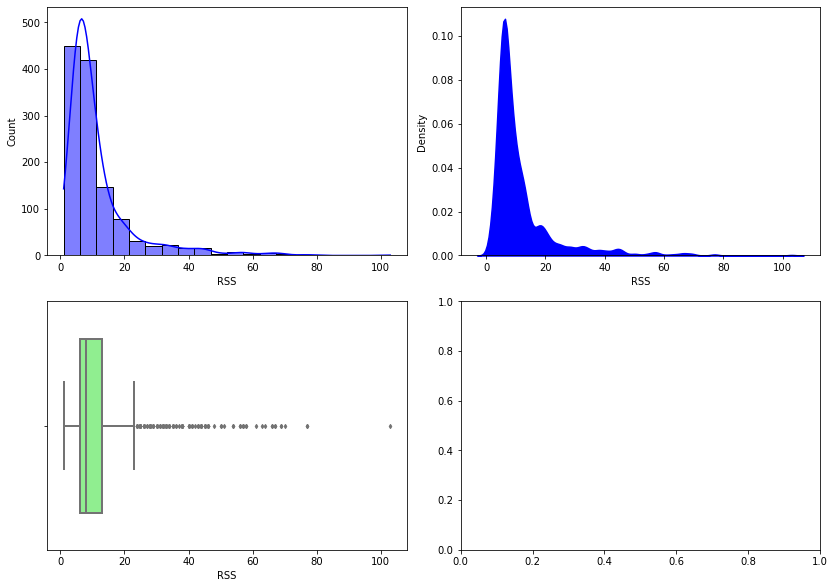

In [54]:
# Estudio Visualización "RSS"
# Métricas RSS
print("               ============================================================================")
print(f"               ===============          MEDIA DE RSS:     {data['RSS'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE RSS:    {data['RSS'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE RSS:      {data['RSS'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE RSS:  {data['RSS'].std():,.5f}          ===============")
print("               ============================================================================")

# Visualización Histograma, Densidad y Boxplot de RSS
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["RSS"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["RSS"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["RSS"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

---
<a id="DURACION"></a>
# <font color="#004D7F">Estudio Visualización _"DURACION"_</font>

               ===============          MEDIA DE DURACION:     771.56306          ===============
               ===============          MEDIANA DE DURACION:   520.00000          ===============
               ===============          SESGO DE DURACION:       2.45963          ===============
               ===============          VARIANZA DE DURACION:  686.14350          ===============


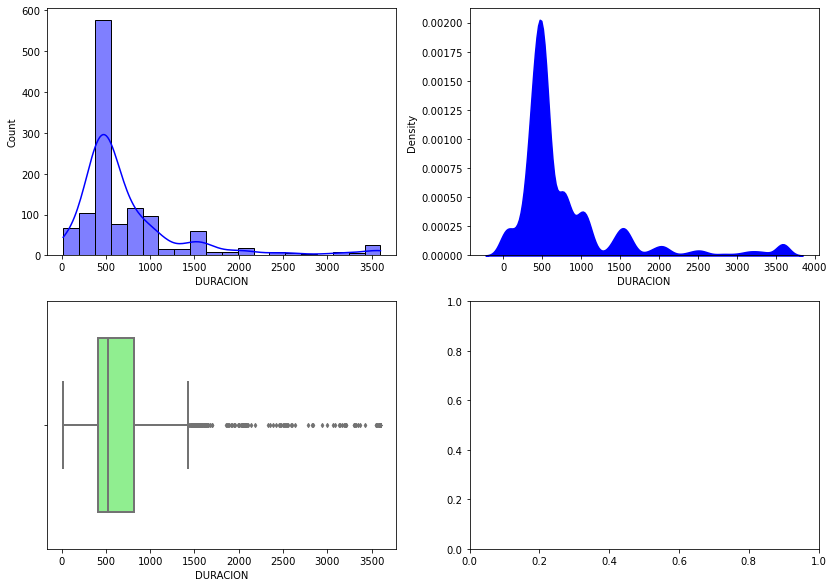

In [55]:
# Estudio Visualización "DURACION"
# Métricas DURACION
print("               ==================================================================================")
print(f"               ===============          MEDIA DE DURACION:     {data['DURACION'].mean():,.5f}          ===============")
print(f"               ===============          MEDIANA DE DURACION:   {data['DURACION'].median():,.5f}          ===============")
print(f"               ===============          SESGO DE DURACION:       {data['DURACION'].skew():,.5f}          ===============")
print(f"               ===============          VARIANZA DE DURACION:  {data['DURACION'].std():,.5f}          ===============")
print("               ==================================================================================")

# Visualización Histograma, Densidad y Boxplot de DURACION
f, axes = plt.subplots(2,2, figsize =(11.7,8.27))

sns.histplot(data["DURACION"],     ax = axes [0,0], kde = True, bins = 20, color="Blue", fill=True)

sns.kdeplot(data["DURACION"],      ax = axes [0,1], shade = True, color = "Blue", fill = True,
                                        bw_adjust=.5, clip_on=False, alpha=1, linewidth=1.5)

sns.boxplot(x = data["DURACION"],   ax = axes [1,0], orient = "h", color = "lightgreen", saturation = 1,
                                        width = 0.7, dodge = True, fliersize = 3, linewidth = 2)
plt.tight_layout()
plt.show()

<a id="MULTIVARIABLE"></a>
# <font color="#004D7F">Visualización Multivariable</font>

Los gráficos multivariables son los gráficos en los que podemos analizar la relación o interacciones entre atributos. El objetivo es aprender algo acerca de la distribución, la tendencia y la distribución en grupos de datos, generalmente pares de atributos.

<a id="CORRELACION"></a>
## <font color="#004D7F">Matriz de correlación </font>

Podemos ver que la matriz es simétrica, es decir, la parte inferior izquierda de la matriz es la misma que la parte superior derecha. Esto es útil ya que podemos ver dos vistas diferentes en los mismos datos en una parcela. También podemos ver que cada variable está perfectamente correlacionada positivamente entre sí (como era de esperar) en la línea diagonal desde la parte superior izquierda a la parte inferior derecha.

<a id="PEARSON"></a>
## <font color="#004D7F">Coeficientes de "Pearson"</font>

Mediante la visualización de los coeficientes de Pearson de las diferentes características, podremos(a priori), conocer la correlación existente entre las diferentes características y así, a un simple golpe de vista ver las características candidatas a ser eliminadas por tener una fuerte relación entre ellas o simplemente por sólo aportar "ruido" a nuestro conjunto de datos. A grandes rasgos, aplicaremos los siguientes criterios tanto para `Person` como para `Spearman`:
   * Características candidadtas a ser eliminadas coeficiente > **0.75**
   * Características candidadtas a ser eliminadas coeficiente < **-0.75**

Una cuestión muy dierente serán los coeficientes que obtengamos en nuestra clase a predecir `DURACION` con las otras características y que cuanto más cerca de **1** estén esos coeficientes, serán mejores candidatas a **"no ser eliminadas".** 

=======================================         COEFICIENTES DE PEARSON         =======================================


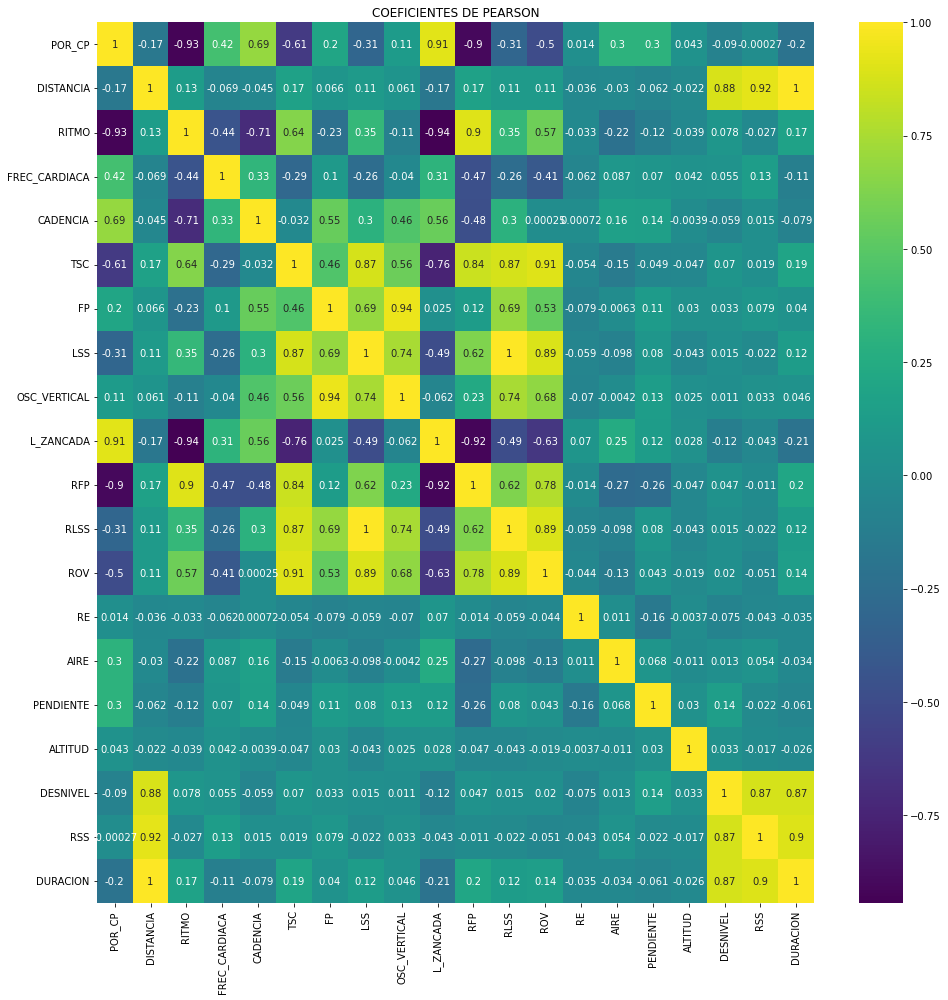

In [56]:
# **********************************************************************************
# *********        CORRELACIÓN ENTRE LAS DIFERENTES CARACTERÍSTICAS        *********
# **********************************************************************************
# COEFICIENTE DE PEARSON
print("=======================================================================================================================")
print("=======================================         COEFICIENTES DE PEARSON         =======================================")
print("=======================================================================================================================")
pearson     = data.corr(method="pearson")
#   Graficamos la matriz de correlación (Pearson)
plt.figure(figsize=(14,14))
sns.heatmap(pearson, vmax =1, annot=True, cmap='viridis')
plt.title("COEFICIENTES DE PEARSON")
plt.tight_layout()
plt.show()

<a id="SPEARMAN"></a>
## <font color="#004D7F">Coeficientes de "Spearman"</font>

=======================================         COEFICIENTES DE SPEARMAN        =======================================


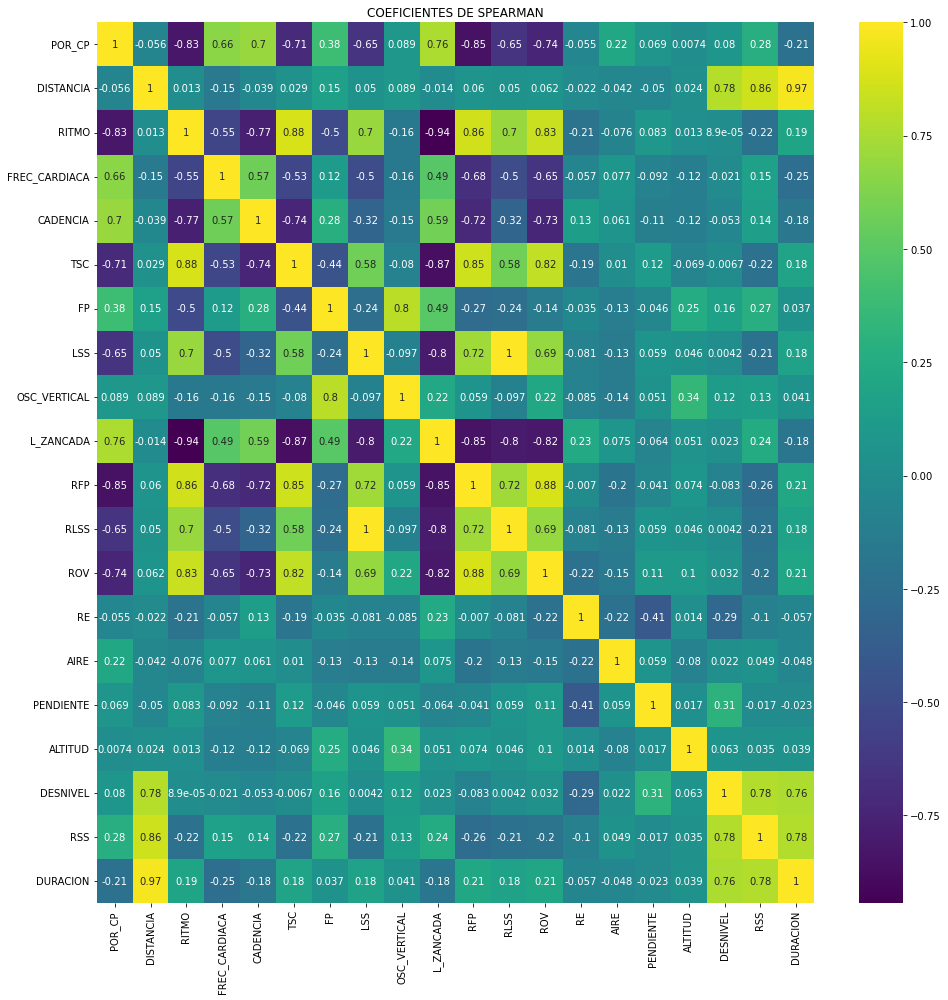

In [57]:
# **********************************************************************************
# *********        CORRELACIÓN ENTRE LAS DIFERENTES CARACTERÍSTICAS        *********
# **********************************************************************************
# COEFICIENTE DE SPEARMAN
print("=======================================================================================================================")
print("=======================================         COEFICIENTES DE SPEARMAN        =======================================")
print("=======================================================================================================================")
pearson     = data.corr(method="spearman")
#   Graficamos la matriz de correlación (Spearman)
plt.figure(figsize=(14,14))
sns.heatmap(pearson, vmax =1, annot=True, cmap='viridis')
plt.title("COEFICIENTES DE SPEARMAN")
plt.tight_layout()
plt.show()

<a id="DISPERSION"></a>
## <font color="#004D7F">Gráficos de Matriz de Dispersion</font>

Al igual que el diagrama de matriz de correlación anterior, la matriz de diagrama de dispersión es simétrica. Esto es útil para mirar las relaciones por pares desde diferentes perspectivas. Debido a que no tiene mucho sentido dibujar un diagrama de dispersión de cada variable consigo mismo, la diagonal muestra histogramas de cada atributo.

Para poder ser visibles y entendibles las realizaremos en grupos de 4 con la clase "DURACION"

<a id="FUNCION"></a>
## <font color="#004D7F">Función para Gráficos de Matriz de Dispersion</font>

In [58]:
# FUNCIÓN PARA OPTIMIZAR CÓDIGO
def matrizcorrelacion(data_grupo):

    g = sns.PairGrid(data_grupo,      palette = None, hue_kws = None,
                      vars = None,    corner = True,  diag_sharey = True,
                      height = 4,     aspect = 1,     layout_pad = 0.5,
                      despine = True, dropna = False, size = None)

    g.map_diag(sns.histplot, color="red")

    g.map_offdiag(sns.scatterplot, color="blue")

    g.add_legend()

    plt.tight_layout()
    plt.show()

<a id="CREARGRUPOS"></a>
## <font color="#004D7F">Creación de grupos para graficar matrices de dispersión</font>

In [59]:
# CREACIÓN DE DIFERENTES GRUPOS PARA EVITAR SATURACIÓN
df_grupo1 = data[["POR_CP","DISTANCIA","DURACION"]]
df_grupo2 = data[["RITMO","FREC_CARDIACA","DURACION"]]
df_grupo3 = data[["CADENCIA","TSC","DURACION"]]
df_grupo4 = data[["FP","LSS","DURACION"]]
df_grupo5 = data[["OSC_VERTICAL","L_ZANCADA","DURACION"]]
df_grupo6 = data[["RFP","RLSS","DURACION"]]
df_grupo7 = data[["ROV","RE","DURACION"]]
df_grupo8 = data[["AIRE","PENDIENTE","DURACION"]]
df_grupo9 = data[["ALTITUD","DESNIVEL","DURACION"]]
df_grupo10 = data[["RSS","DURACION"]]

<a id="GRAFICO1"></a>
## <font color="#004D7F">Grupo 1 "POR_CP","DISTANCIA","DURACION"</font>

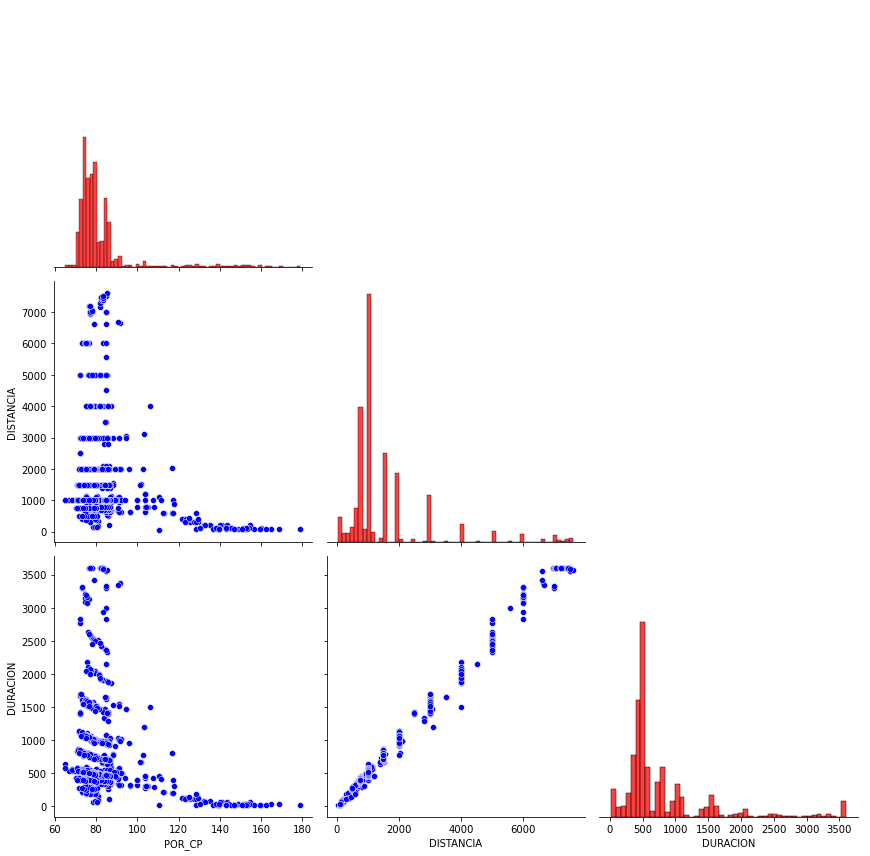

In [60]:
# **************************************************************************
# *********        GRÁFICOS DE MATRIZ DE CORRELACIÓN GRUPO 1       *********
# **************************************************************************
matrizcorrelacion(df_grupo1)

<a id="GRAFICO2"></a>
## <font color="#004D7F">Grupo 2 "RITMO","FREC_CARDIACA","DURACION"</font>

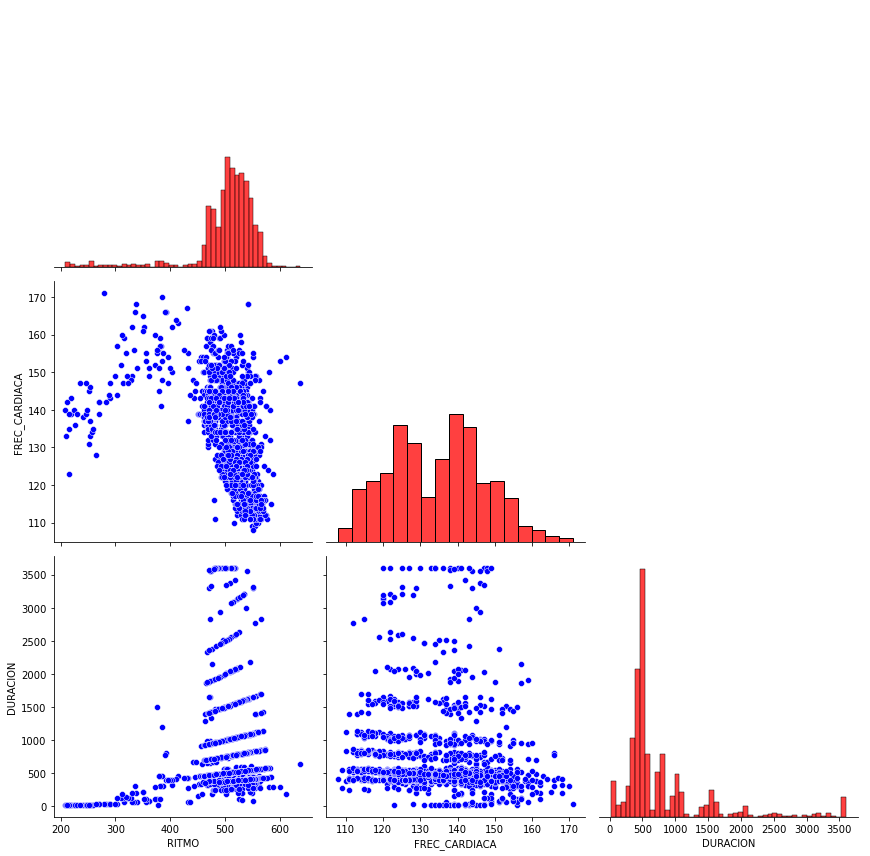

In [61]:
# **************************************************************************
# *********        GRÁFICOS DE MATRIZ DE CORRELACIÓN GRUPO 2       *********
# **************************************************************************
matrizcorrelacion(df_grupo2)

<a id="GRAFICO3"></a>
## <font color="#004D7F">Grupo 3 "CADENCIA","TSC","DURACION"</font>

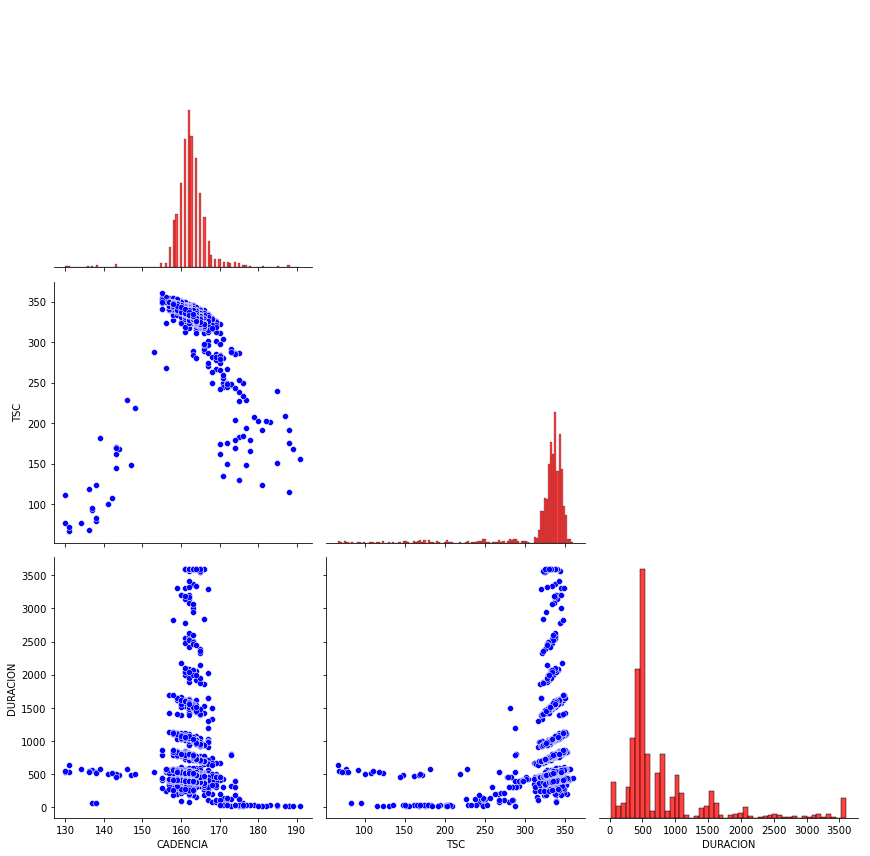

In [62]:
# **************************************************************************
# *********        GRÁFICOS DE MATRIZ DE CORRELACIÓN GRUPO 3       *********
# **************************************************************************
matrizcorrelacion(df_grupo3)

<a id="GRAFICO4"></a>
## <font color="#004D7F">Grupo 4 "FP","LSS","DURACION"</font>

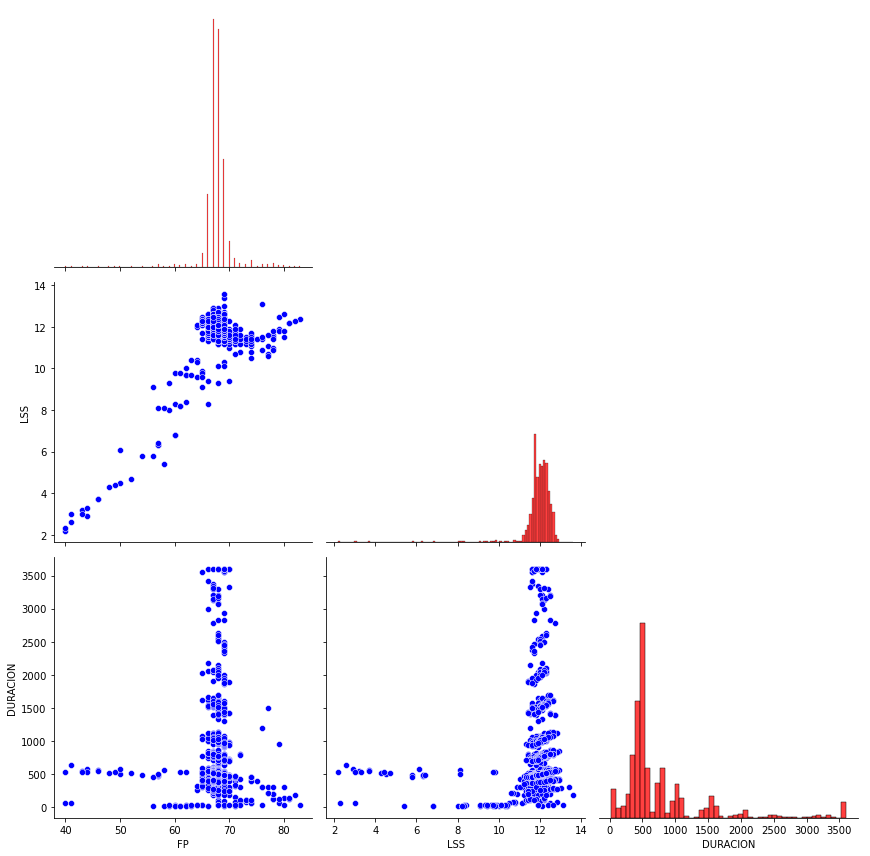

In [63]:
# **************************************************************************
# *********        GRÁFICOS DE MATRIZ DE CORRELACIÓN GRUPO 4       *********
# **************************************************************************
matrizcorrelacion(df_grupo4)

<a id="GRAFICO5"></a>
## <font color="#004D7F">Grupo 5 "OSC_VERTICAL","L_ZANCADA","DURACION"</font>

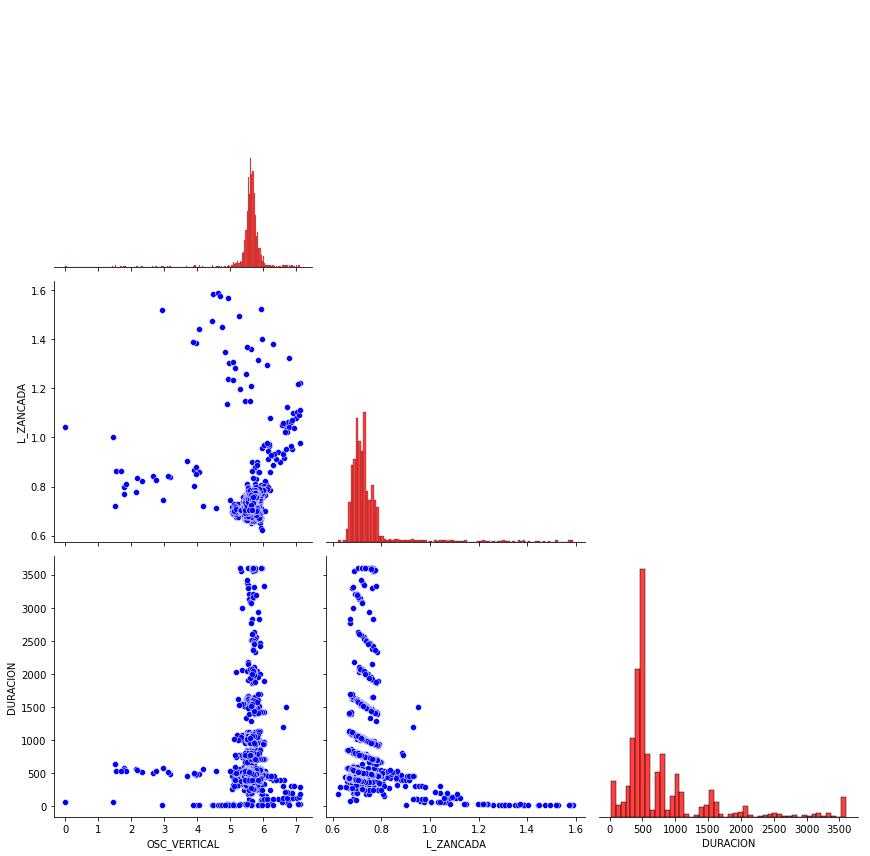

In [64]:
# **************************************************************************
# *********        GRÁFICOS DE MATRIZ DE CORRELACIÓN GRUPO 5       *********
# **************************************************************************
matrizcorrelacion(df_grupo5)

<a id="GRAFICO6"></a>
## <font color="#004D7F">Grupo 6 "RFP","RLSS","DURACION"</font>

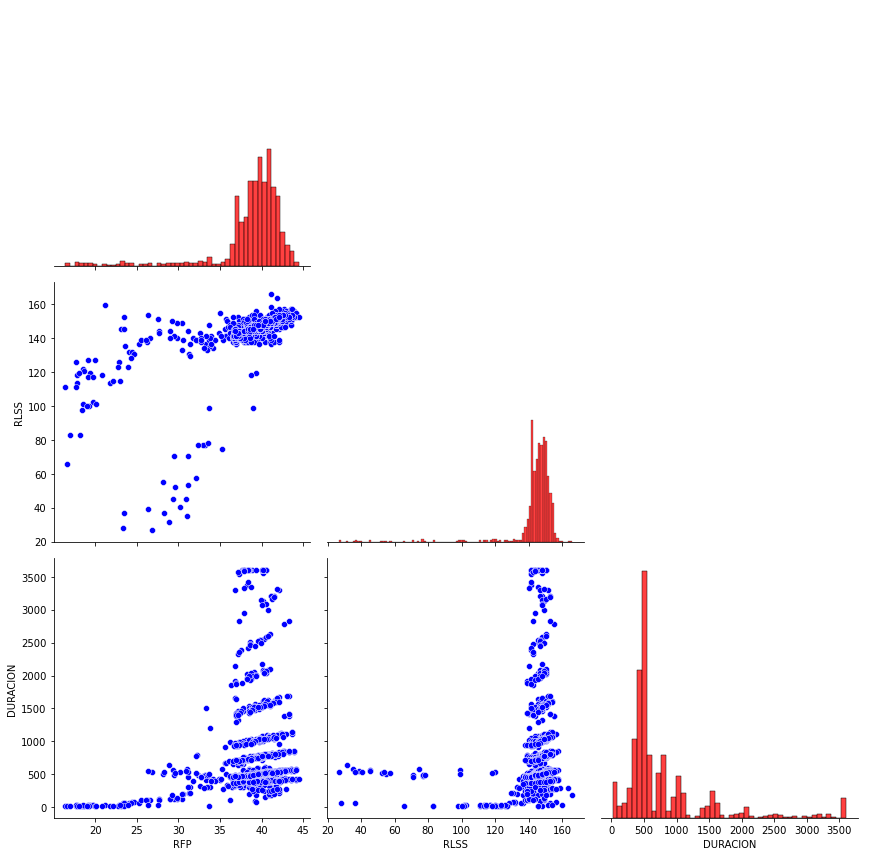

In [65]:
# **************************************************************************
# *********        GRÁFICOS DE MATRIZ DE CORRELACIÓN GRUPO 6       *********
# **************************************************************************
matrizcorrelacion(df_grupo6)

<a id="GRAFICO7"></a>
## <font color="#004D7F">Grupo 7 "ROV","RE","DURACION"</font>

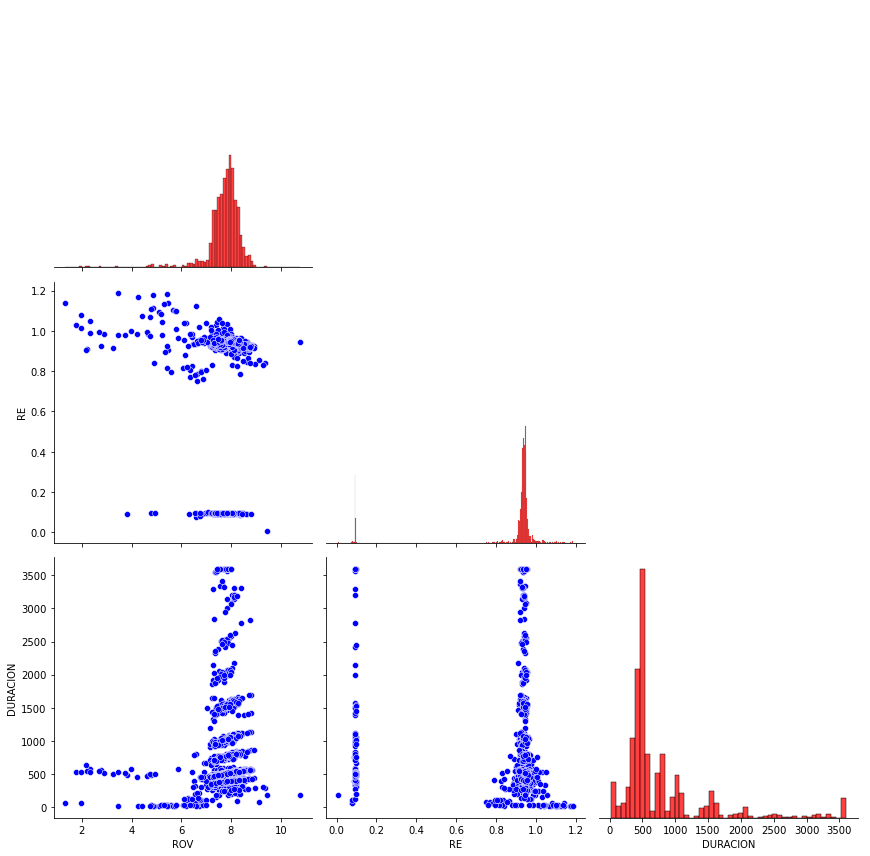

In [66]:
# **************************************************************************
# *********        GRÁFICOS DE MATRIZ DE CORRELACIÓN GRUPO 7       *********
# **************************************************************************
matrizcorrelacion(df_grupo7)

<a id="GRAFICO8"></a>
## <font color="#004D7F">Grupo 8 "AIRE","PENDIENTE","DURACION"</font>

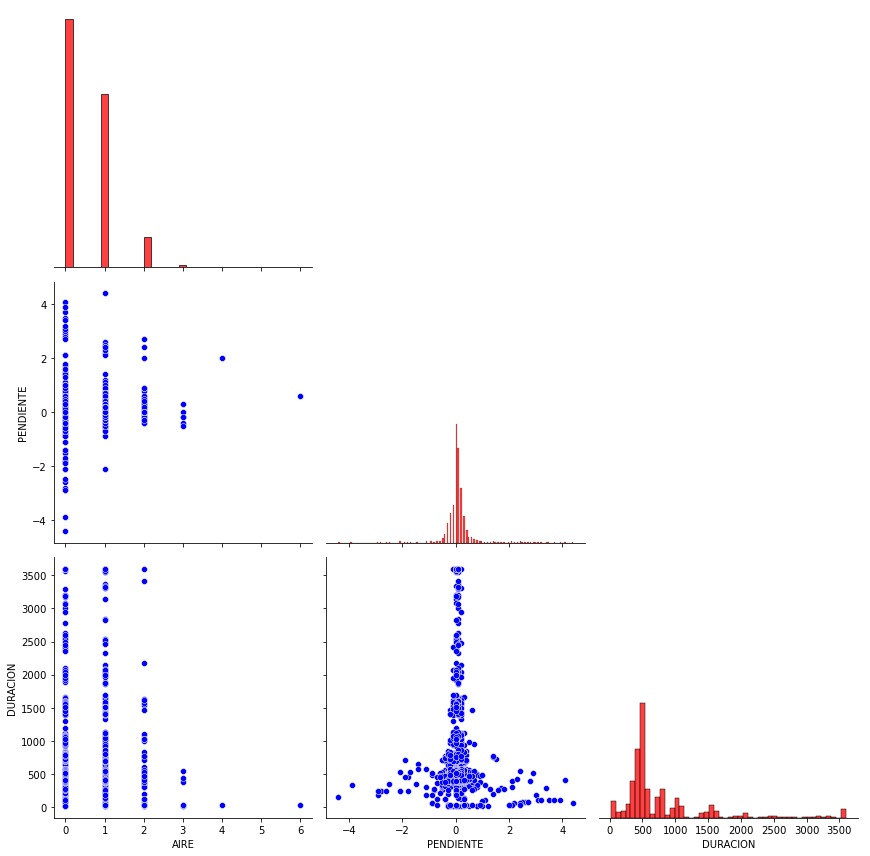

In [67]:
# **************************************************************************
# *********        GRÁFICOS DE MATRIZ DE CORRELACIÓN GRUPO 8       *********
# **************************************************************************
matrizcorrelacion(df_grupo8)

<a id="GRAFICO9"></a>
## <font color="#004D7F">Grupo 9 "ALTITUD","DESNIVEL","DURACION"</font>

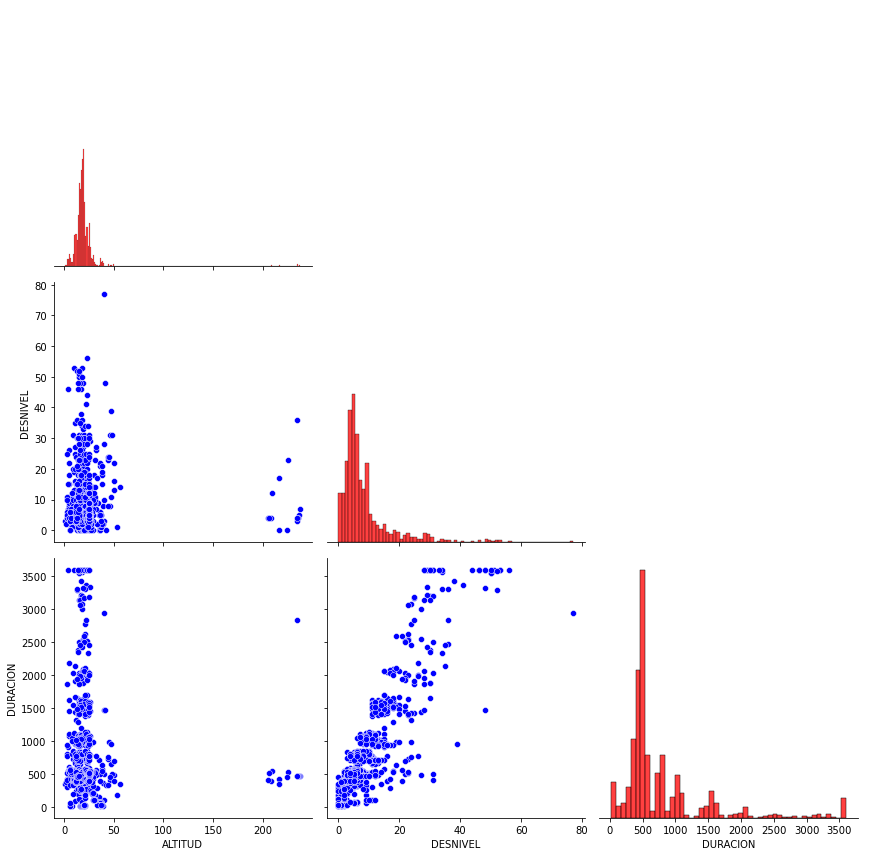

In [68]:
# **************************************************************************
# *********        GRÁFICOS DE MATRIZ DE CORRELACIÓN GRUPO 9       *********
# **************************************************************************
matrizcorrelacion(df_grupo9)

<a id="GRAFICO10"></a>
## <font color="#004D7F">Grupo 10 "RSS","DURACION"</font>

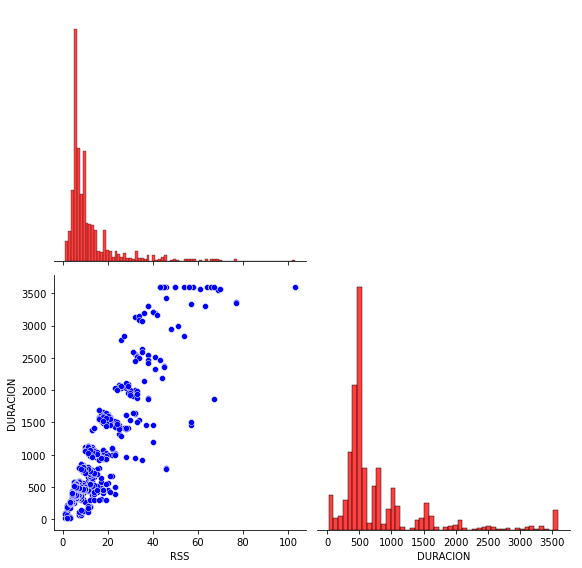

In [69]:
# **************************************************************************
# *********        GRÁFICOS DE MATRIZ DE CORRELACIÓN GRUPO 10      *********
# **************************************************************************
matrizcorrelacion(df_grupo10)

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>